# Data Analyst Nanodegree
## Investigate a Dataset Project

### Dataset Chosen : TMDB Movies
### Introduction
In this project, I've investigated a TMDb movies database which has collection of detials of about 10k+ movies, including their details of budget, revenue, release dates, etc. and then i communicate my findings about it. i've used the Python libraries NumPy, pandas, and Matplotlib to make my analysis easier.

### Questions to be answered:
1- Which genres are most popular from year to year?

2- make a visualization that shows the change in the animation genre during the decades. 

3- make a visualization that shows the most directors who has made most films and the highest revenue they have made. 

4- what is the most genre each director has made his movies of and what is the mean vote average each of them has gotten on his movies of that genre.


In [37]:
# import pandas and load cancer data
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

df = pd.read_csv('tmdb-movies.csv')
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


## Cleaning Data :


the analysis won't be correct with duplicates so i must drop them

In [38]:
# check for duplicates in the data
sum(df.duplicated())

1

In [39]:
# drop duplicates
df.drop_duplicates(inplace=True)

In [40]:
# confirm correction by rechecking for duplicates in the data
sum(df.duplicated())

0

i have to fill nulls so i don't get errors while i'm working with the data

In [41]:
#view missing value count for each feature
df.isnull().sum()

id                         0
imdb_id                   10
popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
homepage                7929
director                  44
tagline                 2824
keywords                1493
overview                   4
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64

In [42]:
#to fill nall values and assign the changes to the original
df.fillna('None',inplace=True)

In [43]:
#checks if any of the columns have null values - should print false (false means there are no nulls)
df.isnull().sum().any()

False

In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10865 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10865 non-null  int64  
 1   imdb_id               10865 non-null  object 
 2   popularity            10865 non-null  float64
 3   budget                10865 non-null  int64  
 4   revenue               10865 non-null  int64  
 5   original_title        10865 non-null  object 
 6   cast                  10865 non-null  object 
 7   homepage              10865 non-null  object 
 8   director              10865 non-null  object 
 9   tagline               10865 non-null  object 
 10  keywords              10865 non-null  object 
 11  overview              10865 non-null  object 
 12  runtime               10865 non-null  int64  
 13  genres                10865 non-null  object 
 14  production_companies  10865 non-null  object 
 15  release_date       

## Data Wrangling


   First i have chosen the columns that i need to answer the question

In [45]:

#choosing the columns i need to answer the qustion
genre = df.loc[:, ['id','original_title', 'genres','release_year']]
genre.head()

,id,original_title,genres,release_year
0,135397,Jurassic World,Action|Adventure|Science Fiction|Thriller,2015
1,76341,Mad Max: Fury Road,Action|Adventure|Science Fiction|Thriller,2015
2,262500,Insurgent,Adventure|Science Fiction|Thriller,2015
3,140607,Star Wars: The Force Awakens,Action|Adventure|Science Fiction|Fantasy,2015
4,168259,Furious 7,Action|Crime|Thriller,2015


i need to split genres column on | 

In [46]:
#spliting the genres on | and put them in a list
genres_list = genre.genres.str.split('|').tolist()

In [47]:
#stacking the list to index
df_genre=pd.DataFrame(genres_list, index=genre['id']).stack()
df_genre

id       
135397  0             Action
        1          Adventure
        2    Science Fiction
        3           Thriller
76341   0             Action
                  ...       
39768   0            Mystery
        1             Comedy
21449   0             Action
        1             Comedy
22293   0             Horror
Length: 26978, dtype: object

In [48]:
#turning it into a dataframe
df_genre = df_genre.reset_index()
df_genre.head()

,id,level_1,0
0,135397,0,Action
1,135397,1,Adventure
2,135397,2,Science Fiction
3,135397,3,Thriller
4,76341,0,Action


here i have removed the columns that i don't need

In [49]:
#removing level-1 column
df_genre = df_genre.loc[:, ['id', 0]]
df_genre.head()

,id,0
0,135397,Action
1,135397,Adventure
2,135397,Science Fiction
3,135397,Thriller
4,76341,Action


In [50]:
#renaming 0 column
df_genre.columns = ['id', 'genre']
df_genre

,id,genre
0,135397,Action
1,135397,Adventure
2,135397,Science Fiction
3,135397,Thriller
4,76341,Action
...,...,...
26973,39768,Mystery
26974,39768,Comedy
26975,21449,Action
26976,21449,Comedy


In [51]:
#deleting genres column from genre
del genre['genres']

here i merged the two dataframes i made 

In [52]:
#merging genre with df_gnre
merged = pd.merge(genre, df_genre, on='id', how='left')
merged.head()

,id,original_title,release_year,genre
0,135397,Jurassic World,2015,Action
1,135397,Jurassic World,2015,Adventure
2,135397,Jurassic World,2015,Science Fiction
3,135397,Jurassic World,2015,Thriller
4,76341,Mad Max: Fury Road,2015,Action


### Exploratory Data Analysis

here i have used group by to get the count of each year with its genres

In [53]:
#each year with it's counted genres
most_genre=merged.groupby(['release_year','genre']).count()
most_genre.head(20)

id  original_title
release_year genre                              
1960         Action            8               8
             Adventure         5               5
             Comedy            8               8
             Crime             2               2
             Drama            13              13
             Family            3               3
             Fantasy           2               2
             Foreign           1               1
             History           5               5
             Horror            7               7
             Music             1               1
             Romance           6               6
             Science Fiction   3               3
             Thriller          6               6
             War               2               2
             Western           6               6
1961         Action            7               7
             Adventure         6               6
             Animation         1               1
             Comedy           10              10

In [54]:
#saving it into a new csv file 
most_genre.to_csv('most_genre.csv')
df_mg = pd.read_csv('most_genre.csv')
df_mg.head()

,release_year,genre,id,original_title
0,1960,Action,8,8
1,1960,Adventure,5,5
2,1960,Comedy,8,8
3,1960,Crime,2,2
4,1960,Drama,13,13


removing and renaming columns

In [55]:
#removing id column
df_mg.drop('id', axis = 1,inplace=True)
#rename original_title column
df_mg.rename(columns = {'original_title':'count'},inplace=True)
df_mg.head()

,release_year,genre,count
0,1960,Action,8
1,1960,Adventure,5
2,1960,Comedy,8
3,1960,Crime,2
4,1960,Drama,13


### here we get the answer for the first question:
##### Which genres are most popular from year to year?

In [56]:
#getting which genres are most popular from year to year to answer the qustion above
the_most=df_mg.sort_values('count', ascending=False).drop_duplicates(['release_year'])
sorted_=the_most.sort_values('release_year', ascending=False)
sorted_.head(50)

,release_year,genre,count
1050,2015,Drama,260
1030,2014,Drama,284
1010,2013,Drama,253
989,2012,Drama,232
969,2011,Drama,214
948,2010,Drama,210
928,2009,Drama,224
907,2008,Drama,233
887,2007,Drama,197
867,2006,Drama,197


### Answering the second question
#### make a visualization that shows the change in the animation genre during the decades.

i have chosen a line chart because i wanted to show a comparison over time during many periods for one ordered variable.

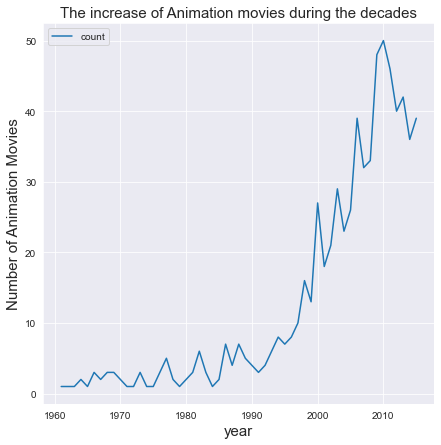

In [57]:
chart=df_mg['genre']=='Animation'
chart_df=df_mg[chart]
#making the visualzation
sns.set_style('darkgrid')
chart_df.plot(x='release_year',y='count',figsize=(7,7))

#x-axis label name
plt.xlabel('year', fontsize = 15)
#y-axis label name
plt.ylabel('Number of Animation Movies', fontsize=15)
#title of the graph
plt.title('The increase of Animation movies during the decades', fontsize=15)
plt.savefig('anime.png')
plt.show()

in this plot we can see the growth of intrest of making animation movies,for three decades the count of antimation movies never hit 10, untill the end of the 20s ceuntry at the mid of the nineties the plot shows a fast increase of movies of that genre.



### Exploratory Data Analysis to answer the third question

In [58]:
#getting the columns i need 
films_directors = df.loc[:, ['original_title', 'director']]
#counting flims for each directors
counted_directors =films_directors.groupby('director').count()
#saving it into a new csv file
counted_directors.to_csv('pla.csv')
df_directors=pd.read_csv('pla.csv')
#renameing a column
df_directors.rename(columns = {'original_title':'count'},inplace=True)
#sorting by the count column to get the most directors who have made films
show_directors=df_directors.sort_values('count', ascending=False)
show_directors.head(20)

,director,count
5000,Woody Allen,45
3598,None,44
878,Clint Eastwood,34
3175,Martin Scorsese,29
4602,Steven Spielberg,29
4034,Ridley Scott,23
4190,Ron Howard,22
4601,Steven Soderbergh,22
2348,Joel Schumacher,21
576,Brian De Palma,20


In [59]:
#making list for the top ten directors
top_dir= ['Woody Allen','Ron Howard','Clint Eastwood','Steven Spielberg','Martin Scorsese','Ridley Scott','Steven Soderbergh','Joel Schumacher','Brian De Palma','Wes Craven']
#creating a dataframe for the top directors
df_td = df[df['director'].isin(top_dir)]
#each director with his highest revenue_adj
top_ten=df_td.sort_values('revenue_adj', ascending=False).drop_duplicates(['director'])
top_ten

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
9806,578,tt0073195,2.563191,7000000,470654000,Jaws,Roy Scheider|Robert Shaw|Richard Dreyfuss|Lorr...,http://www.jaws25.com/,Steven Spielberg,Don't go in the water.,...,An insatiable great white shark terrorizes the...,124,Horror|Thriller|Adventure,Universal Pictures|Zanuck/Brown Productions,6/18/75,1415,7.3,1975,2.836275e+07,1.907006e+09
6558,591,tt0382625,3.655536,125000000,758239851,The Da Vinci Code,Tom Hanks|Audrey Tautou|Ian McKellen|Paul Bett...,http://www.sonypictures.com/homevideo/thedavin...,Ron Howard,So Dark The Con Of Man,...,When the curator of the Louvre is found murder...,149,Thriller|Mystery,Columbia Pictures|Imagine Entertainment|Skylar...,5/17/06,1585,6.4,2006,1.352086e+08,8.201647e+08
8458,954,tt0117060,3.293387,80000000,457696359,Mission: Impossible,Tom Cruise|Jon Voight|Emmanuelle BÃ©art|Henry ...,http://www.missionimpossible.com/,Brian De Palma,Expect the Impossible.,...,"When Ethan Hunt, the leader of a crack espiona...",110,Adventure|Action|Thriller,Paramount Pictures|Cruise/Wagner Productions,5/21/96,1754,6.5,1996,1.112173e+08,6.362971e+08
8661,98,tt0172495,4.271452,103000000,457640427,Gladiator,Russell Crowe|Joaquin Phoenix|Connie Nielsen|O...,None,Ridley Scott,A Hero Will Rise.,...,General Maximus' success in battle earns the f...,155,Action|Drama|Adventure,DreamWorks SKG|Universal Pictures|Scott Free P...,5/1/00,3531,7.7,2000,1.304281e+08,5.795065e+08
2641,161,tt0240772,2.642249,85000000,450717150,Ocean's Eleven,George Clooney|Brad Pitt|Matt Damon|Andy GarcÃ...,http://www.warnerbros.co.uk/movies/oceans-eleven,Steven Soderbergh,Are you in or out?,...,"Less than 24 hours into his parole, charismati...",116,Thriller|Crime,Village Roadshow Pictures|Section Eight|NPV En...,12/7/01,2645,7.0,2001,1.046765e+08,5.550528e+08
657,190859,tt2179136,3.863074,58800000,542307423,American Sniper,Bradley Cooper|Sienna Miller|Kyle Gallner|Cole...,http://www.americansnipermovie.com,Clint Eastwood,The most lethal sniper in U.S. history.,...,U.S. Navy SEAL Chris Kyle takes his sole missi...,134,War|Action,Village Roadshow Pictures|Malpaso Productions|...,12/11/14,3004,7.5,2014,5.416015e+07,4.995145e+08
8082,414,tt0112462,1.593740,100000000,336529144,Batman Forever,Val Kilmer|Tommy Lee Jones|Jim Carrey|Nicole K...,None,Joel Schumacher,"Courage now, truth always...",...,The Dark Knight of Gotham City confronts a das...,121,Science Fiction|Fantasy|Action|Crime,Warner Bros.|Polygram Filmed Entertainment,5/31/95,868,5.2,1995,1.430967e+08,4.815621e+08
5428,106646,tt0993846,4.877927,100000000,392000694,The Wolf of Wall Street,Leonardo DiCaprio|Jonah Hill|Margot Robbie|Kyl...,http://www.thewolfofwallstreet.com/,Martin Scorsese,EARN. SPEND. PARTY.,...,A New York stockbroker refuses to cooperate in...,180,Crime|Drama|Comedy,Paramount Pictures|Appian Way|EMJAG Production...,12/25/13,4027,7.9,2013,9.360334e+07,3.669257e+08
8475,4232,tt0117571,1.286189,14000000,173046663,Scream,David Arquette|Neve Campbell|Courteney Cox|Mat...,None,Wes Craven,Someone has taken their love of scary movies o...,...,A killer known as Ghostface begins killing off...,111,Crime|Horror|Mystery,Woods Entertainment|Dimension Films,12/19/96,779,6.9,1996,1.946303e+07,2.405724e+08
3429,59436,tt1605783,1.367727,30000000,151119219,Midnight in Paris,Owen Wilson|Rachel McAdams|Kurt Fuller|Mimi Ke...,http://www.sonyclassics.com/midnightinparis,Woody Allen,None,...,A romantic comedy about a family traveling to ...,94,Fantasy|Comedy|Romance,Gravier Productions|TelevisiÃ³ de Catalunya (T...,5/11/11,1117,7.2,2011,2.908194e+07,1.464947e+08


### Answering the third question
####  make a visualization that shows the most directors who has made most films and the highest revenue they have made. 

i have chosen a barh chart because i wanted to make a comparison among multiple similar ordered variables

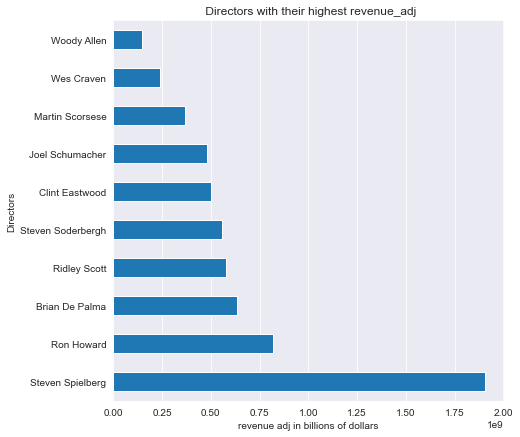

In [68]:
#Making a visualization
top_ten.plot(x='director',y='revenue_adj',kind ='barh',legend=False,figsize=(7,7))
plt.title(" Directors with their highest revenue_adj")
plt.ylabel("Directors")
plt.xlabel("revenue adj in billions of dollars");
#adding grid lines to the plot
plt.grid(axis = 'y')
plt.savefig('DvsRev.png')
plt.show()

this barh shows us the top directors with the highest revenues adj they have gotten on thier movies, as we can see here Steven Spielberg has gotten the highest revenue on his movie Jaws in the seventies with about 1.9 revenue adj, Steven Soderbergh and Ridley Scott has gotten very similar revenues on their movies Gladiator and Ocean's Eleven with 5.7 and 5.5 revenues adj, the lowest revenue was for Woody Allen on his movie MidNight in paris with revenue adj was about 1.4 even through Woody Allen has made movies more than any other director.

### Exploratory Data Analysis for the fourth question

In [61]:
directors = df.loc[:, ['id','director']] #create a dataframe contains only directors name
#merge directors dataframe with the dataframe that contains sprated gnres 
d_and_g= pd.merge(df_genre, directors, on='id', how='left')
grouped_dg=d_and_g.groupby(['genre','director']).count()
grouped_dg

id
genre   director                  
Action   FrÃ©dÃ©ric Jardin       1
        A. Todd Smith            1
        A.R. Murugadoss          1
        Aaron Harvey             1
        Aaron Norris             5
...                             ..
Western Vincent McEveety         1
        Walter Hill              2
        Will Finn|John Sanford   1
        William Wiard            1
        Yves Simoneau            1

[17070 rows x 1 columns]

In [43]:
grouped_dg.to_csv('grouped_dg.csv')
csv_dg = pd.read_csv('grouped_dg.csv')
csv_dg

,genre,director,id
0,Action,FrÃ©dÃ©ric Jardin,1
1,Action,A. Todd Smith,1
2,Action,A.R. Murugadoss,1
3,Action,Aaron Harvey,1
4,Action,Aaron Norris,5
...,...,...,...
17065,Western,Vincent McEveety,1
17066,Western,Walter Hill,2
17067,Western,Will Finn|John Sanford,1
17068,Western,William Wiard,1


In [45]:
csv_dg.rename(columns={'id':'count'},inplace=True)
top_dg=csv_dg[csv_dg['director'].isin(top_dir)]
top_dg.head(20)

,genre,director,count
142,Action,Brian De Palma,3
226,Action,Clint Eastwood,11
615,Action,Joel Schumacher,4
1071,Action,Ridley Scott,12
1124,Action,Ron Howard,5
1254,Action,Steven Soderbergh,1
1255,Action,Steven Spielberg,11
1357,Action,Woody Allen,3
1461,Adventure,Brian De Palma,1
1523,Adventure,Clint Eastwood,5


In [ ]:
df_vote_avg = df.loc[:, ['id', 'vote_average']] #creating a dataframe that contains only id and vote_average 
vote_merge=pd.merge(df_vote_avg, d_and_g, on='id', how='left')

In [ ]:
#getting the mean for the vote_avr for each dir of each of it is genres
vote_mean =vote_merge.groupby(['genre','director']).mean()

In [ ]:
#saving it into a new csv file
vote_mean.to_csv('vote_mean.csv')
df_mean =pd.read_csv('vote_mean.csv')

In [26]:
#getting the top directors
g_v= df_mean[df_mean['director'].isin(top_dir)]
g_v.drop('id', axis = 1,inplace=True)
g_v

C:\Users\reema\anaconda3\lib\site-packages\pandas\core\frame.py:4163: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


,genre,director,vote_average
142,Action,Brian De Palma,7.233333
226,Action,Clint Eastwood,6.245455
615,Action,Joel Schumacher,5.250000
1071,Action,Ridley Scott,6.466667
1124,Action,Ron Howard,6.640000
...,...,...,...
16891,War,Ridley Scott,6.466667
16927,War,Steven Soderbergh,6.233333
16928,War,Steven Spielberg,7.240000
16957,Western,Clint Eastwood,6.433333


### Answering the fourth question 
#### what is the most genre each director has made his movies of and what is the mean vote average each of them has gotten on his movies of that genre.

In [46]:
please = pd.merge(top_dg,g_v, on='director')
#if the genre in genre x doesn't match the genre in y then drop the row
index_names = please[ (please['genre_x'] != please['genre_y'])].index
please.drop(index_names,inplace=True)
#dropping the column that i dont need any more
please.drop('genre_y',axis =1,inplace=True)

please_work=please.sort_values('count', ascending=False).drop_duplicates(['director'])
please_work

,genre_x,director,count,vote_average
1235,Comedy,Woody Allen,38,6.484211
256,Drama,Clint Eastwood,27,6.462963
1372,Drama,Martin Scorsese,23,6.908696
1485,Horror,Wes Craven,18,5.816667
617,Drama,Ridley Scott,17,6.452941
932,Drama,Steven Soderbergh,17,6.129412
1079,Drama,Steven Spielberg,15,6.946667
180,Thriller,Brian De Palma,15,6.586667
448,Drama,Joel Schumacher,14,6.264286
786,Drama,Ron Howard,14,6.542857


In [49]:
#checking for the mean
checking=g_v.director=='Woody Allen'
imtired=g_v[checking]
imtired

,genre,director,vote_average
1357,Action,Woody Allen,6.100000
4960,Comedy,Woody Allen,6.484211
5843,Crime,Woody Allen,6.550000
8717,Drama,Woody Allen,6.416667
10237,Fantasy,Woody Allen,7.100000
10684,History,Woody Allen,7.100000
12764,Mystery,Woody Allen,6.325000
13945,Romance,Woody Allen,6.465000
14845,Science Fiction,Woody Allen,6.900000
16701,Thriller,Woody Allen,6.483333


In [48]:
#checking for the count
checking=top_dg.director=='Woody Allen'
imtired=top_dg[checking]
imtired

,genre,director,count
1357,Action,Woody Allen,3
4960,Comedy,Woody Allen,38
5843,Crime,Woody Allen,6
8717,Drama,Woody Allen,24
10237,Fantasy,Woody Allen,2
10684,History,Woody Allen,1
12764,Mystery,Woody Allen,4
13945,Romance,Woody Allen,20
14845,Science Fiction,Woody Allen,1
16701,Thriller,Woody Allen,6


## Conclusion

from the fourth question's answer it seems to me like that Martin Scorsese could be the best director for the Drama genre for getting the second best vote Average and the second most director of the count of making drama movies.

from the first question's answer we can see that the drama genre is usually the most popular.

### Limitations

especially for older movies there are a lot of missing data which could affect the honesty of this analysing